Homework 4 : Bert Zhao
===

Phase Portraits, expoententials, and solutions

**<span style="color: darkgreen">Due April 24 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

- Most of the state space and transfer function relationships we have been talking about are in Nise chapters 3 and 4. Block diagrams are in chapter 5.

In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
import math
%matplotlib inline

## 1) Modeling

<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

A common model used for tumor growth is 

$$\frac{dv(t)}{dt} = \lambda e^{-\alpha t}v(t)$$
 
*   a) Verify that the solution is given by $$v(t)=V_0 e^{\lambda/\alpha(1-e^{-\alpha t})}$$
where $v_0=v(0)$ is the initial toumor volume.  (Do this by hand or with python, what ever you prefer.  Adding some words to explain your approach will help grading and make sure we understand what you did.) 
*   b) As a toumour grows its resources become constrained and growth is impaired (as modeled by the $e^{-\alpha t}$ term multiplying $v(t)$.)  Find the final predicted toumor volume as $t\rightarrow \infty$.  (Do this one however you like as well but python is probably more work and time consuming)
*   c) For a tumor the parameters were found to be $\lambda = 50$ hours, $\alpha = 3$ hours and $v_0 = 0.1$ millileters.  Plot (by computer) $v(t)$ vs $t$
*   d) Check your plot from c) agrees with your answer in part b).

 


---

## a)

Seperation of variables

$$ \frac{1}{v(t)} dv(t) = \lambda e^{-\alpha t} dt$$

Integrate both sides

$$\int \frac{1}{v(t)} dv(t) = \int_0^t \lambda e^{-\alpha t} dt$$

$$ \ln{v(t)} + c = \frac{\lambda} {\alpha} (1 - e^{-\alpha t})$$

Isolate $v(t)$

$$ \ln{v(t)} = \frac{\lambda} {\alpha} (1 - e^{-\alpha t}) - c$$

$$v(t) = e^{\frac{\lambda} {\alpha} (1 - e^{-\alpha t}) - c}$$

$$v(t) = e^{-c} e^{\frac{\lambda} {\alpha} (1 - e^{-\alpha t})}$$

Replace $e^{-c}$ with generic constant $A$

$$v(t) = A e^{\frac{\lambda} {\alpha} (1 - e^{-\alpha t})}$$

Account for initial value $v(0) = V_0$

$$v(0) = Ae^{\frac{\lambda} {\alpha} (1 - e^{-\alpha 0})} = A$$

$$A=V_0$$

## b)

The final value of $v(t)$ can be gotten by:

$$\lim_{t \to \infty} v(t) = V_0 e^{\frac{\lambda} {\alpha} (1 - e^{-\alpha \infty})} = V_0 e^{\frac{\lambda} {\alpha}}$$

Text(0.5, 1.0, 'Tumor Growth vs Time')

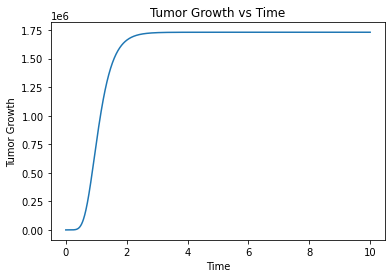

In [19]:
l = 50
a = 3
v0 = 0.1

t = np.linspace(0, 10, 1000)
v = v0 * np.exp((l/a) * (1 - np.exp(-a*t)))

plt.plot(t, v)
plt.xlabel("Time")
plt.ylabel("Tumor Growth")
plt.title("Tumor Growth vs Time")

##d)
We can see that based on the graph, the final value of $v(t)$ is approximately $1.75 \cdot 10^6$. We can also calculate the final value using the limit from part b.

$$\lim_{t \to \infty} v(t) = V_0 e^{\frac{\lambda} {\alpha} (1 - e^{-\alpha \infty})} = V_0 e^{\frac{\lambda} {\alpha}}$$


$$0.1 e^{\frac{50} {3}} = 1.731 \cdot 10^6$$


## 2) Transfer Functions from State Space

For the following transfer functions, compute $T(s)=\frac{Y(s)}{U(s)}$ using python.

### a)
\begin{align} \dot x &= 
\left(
\begin{array}{ccc}
 -7 & -3 & 3 \\
 -6 & -12 & 10 \\
 -7 & -9 & 7 \\
\end{array}
\right)
x + 
\left(
\begin{array}{c}
 -1 \\
 0 \\
 1 \\
\end{array}
\right)
u \\
y &= 
\left(
\begin{array}{ccc}
 1 & 1 & 1 \\
\end{array}
\right)
 x.
\end{align}

### b) 
\begin{align}\dot x &= \left(
\begin{array}{ccc}
 0 & 1 & 0 \\
 0 & 0 & 1 \\
 -1 & -3 & -8 \\
\end{array}
\right)  x + \left(
\begin{array}{c}
 0 \\
 0 \\
 4 \\
\end{array}
\right) u \\
 y &= \left(
\begin{array}{ccc}
 2 & 0 & 0 \\
\end{array}
\right) x
\end{align}

### c) 
\begin{align}\dot x &= \left(
\begin{array}{ccc}
 3 & 1 & -5 \\
 -1 & -4 & -2 \\
 4 & 5 & -1 \\
\end{array}
\right)  x + \left(
\begin{array}{c}
 2 \\
 5 \\
 3 \\
\end{array}
\right) u \\
y &= \left(
\begin{array}{ccc}
 -4 & -2 & -4 \\
\end{array}
\right) x
\end{align}

### d)
\begin{align}\dot x &= \left(
\begin{array}{ccccc}
 -2 & -1 & -2 & 0 & 3 \\
 0 & -3 & -3 & -3 & -1 \\
 1 & 2 & -2 & -2 & -3 \\
 -1 & 2 & -3 & -1 & 2 \\
 3 & 2 & 3 & 3 & 2 \\
\end{array}
\right)  x + \left(
\begin{array}{c}
 1 \\
 0 \\
 -1 \\
 -2 \\
 -2 \\
\end{array}
\right) u \\
y &= \left(
\begin{array}{ccccc}
 1 & 1 & -1 & -1 & -2 \\
\end{array}
\right) x
\end{align}



In [20]:
def find_Gs(A, B, C, D):

  s = symbols('s')
  II = eye(A.shape[0])
  Gs = C * (s * II - A).pinv() * B + D
  return simplify(Gs)

A_a = Matrix([[-7, -3, 3], [-6, -12, 10], [-7, -9, 7]])
B_a = Matrix([[-1], [0], [1]])
C_a = Matrix(1, 3, [1, 1, 1])
D_a = Matrix([0])

print('Part a: G(s) = ', find_Gs(A_a, B_a, C_a, D_a))

A_b = Matrix([[0, 1, 0], [0, 0, 1], [-1, -3, -8]])
B_b = Matrix([[0], [0], [4]])
C_b = Matrix(1, 3, [2, 0, 0])
D_b = Matrix([0])

print('Part b: G(s) = ', find_Gs(A_b, B_b, C_b, D_b))

A_c = Matrix([[3, 1, -5], [-1, -4, -2], [4, 5, -1]])
B_c = Matrix([[2], [5], [3]])
C_c = Matrix(1, 3, [-4, -2, -4])
D_c = Matrix([0])

print('Part c: G(s) = ', find_Gs(A_c, B_c, C_c, D_c))

A_d = Matrix([[-2, -1, -2, 0, 3], [0, -3, -3, -3, -1], [1, 2, -2, -2, -3], [-1, 2, -3, -1, 2], [3, 2, 3, 3, 2]])
B_d = Matrix([[1], [0], [-1], [-2], [-2]])
C_d = Matrix(1, 5, [1, 1, -1, -1, -2])
D_d = Matrix([0])

print('Part d: G(s) = ', find_Gs(A_d, B_d, C_d, D_d))

Part a: G(s) =  Matrix([[8*(5*s + 22)/(s**3 + 12*s**2 + 44*s + 48)]])
Part b: G(s) =  Matrix([[8/(s**3 + 8*s**2 + 3*s + 1)]])
Part c: G(s) =  Matrix([[(-30*s**2 - 108*s + 696)/(s**3 + 2*s**2 + 20*s + 22)]])
Part d: G(s) =  Matrix([[(8*s**4 + 60*s**3 + 8*s**2 - 369*s - 22)/(s**5 + 6*s**4 + 11*s**3 - 102*s**2 - 309*s - 130)]])


##a)

$$T(s) = \frac{8(5s+22)}{(s^3+12s^2+44s+48)}$$

##b)

$$T(s) = \frac{8}{(s^3+8s^2+3s+1)}$$

##c)

$$T(s) = \frac{(-30s^2 - 108s + 696)}{(s^3+2s^2+20s+22)}$$

##d)

$$T(s) = \frac{(8s^4+60s^3+8s^2-369s-22)}{(s^5+6s^4+11s^3-102s^2-309s-130)}$$

## 3) Representations

Consider the following state space systems with all subscripted constants (eg $\lambda_1$,$b_1$, $c_1$ etc) being scalars not equal to zero. 

i) Show that all three have the same transfer function (you may do this by hand or with sympy).  

ii) What happens to system a)'s transfer function when $b_1 = 0$?

iii) Can you speculate why this is?  *Your explanation doesn't have to be right for full credit, just give intuition or explain what happens mathematically, anything to show you've given it some thouht is worth full credit.*

a) 
\begin{align}
\dot x &= \lambda_1 x +b_1 u\\
y &= c_1 x
\end{align}

b)
\begin{align}
\dot x &= 
\begin{pmatrix}\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}
 x +
 \begin{pmatrix} b_1 \\
 k_1 
 \end{pmatrix}
 u\\
y &= \begin{pmatrix}c_1 & 0 \end{pmatrix} x
\end{align}

c) 
\begin{align}
\dot x &= 
\begin{pmatrix}\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}
 x +
 \begin{pmatrix} b_1 \\
 0
 \end{pmatrix}
 u\\
y &= \begin{pmatrix}c_1 & k_2 \end{pmatrix} x
\end{align}




## i)
### a)

Laplace Transform

$$sX(s) = \lambda_1 X(s) + b_1 U(s)$$
$$Y(s) = c_1 X(s)$$

Substitute $X(s)$

$$X(s) = \frac {Y(s)}{c_1}$$
$$s \frac {Y(s)}{c_1} = \lambda_1 \frac {Y(s)}{c_1} + b_1 U(s)$$

Solve for $ \frac {Y(s)} {U(s)}$

$$\frac {Y(s)}{c_1} (s-\lambda_1) = b_1U(s)$$

$$\frac {Y(s)}{U(s)} = \frac {b_1c_1} {s-\lambda_1}$$

Parts b and  c solved using sympy give the same answer

In [0]:
#b)

l1, l2, b1, k1, k2, c1 = symbols('l1 l2 b1 k1 k2 c1')
A_2b = Matrix([[l1, 0], [0, l2]])
B_2b = Matrix([[b1], [k1]])
C_2b = Matrix(1, 2, [c1, 0])
D_2b = Matrix([0])

print('Part b: G(s) = ', find_Gs(A_2b, B_2b, C_2b, D_2b))

#c)

A_2c = Matrix([[l1, 0], [0, l2]])
B_2c = Matrix([[b1], [0]])
C_2c = Matrix(1, 2, [c1, k2])
D_2c = Matrix([0])

print('Part c: G(s) = ', find_Gs(A_2c, B_2c, C_2c, D_2c))

Part b: G(s) =  Matrix([[b1*c1/(-l1 + s)]])
Part c: G(s) =  Matrix([[b1*c1/(-l1 + s)]])


## ii) 
Given the transfer function from part a, if $b_1 = 0$,

$$ \frac {b_1c_1} {s-\lambda_1} = \frac {0 \cdot c_1} {s-\lambda_1} = 0$$

so the transfer function also becomes $0$.

## iii)

If we replace $b_1$ with $0$, we get

$$ \dot x = \lambda_1 x + 0 $$
$$ y = c_1 x $$

Taking the Laplace transform, we get

$$sX(s) = \lambda_1 X(s)$$
$$Y(s) = c_1 X(s)$$

We can rearrange $X(s)$

$$(s-\lambda_1)X(s) = 0$$

and if $(s-\lambda_1) \ne 0$, then $X(s) = 0$ so

$$Y(s) = c_1 \cdot 0 = 0$$

Which makes the transfer function

$$\frac {Y(s)} {U(s)} = \frac {0} {U(s)} = 0$$

as shown from part ii, $T(s) = 0$ when $b_1 = 0$.

### 4) Final Value Theorem
Consider the system from 2)a 
\begin{align} \dot x &= 
\left(
\begin{array}{ccc}
 -7 & -3 & 3 \\
 -6 & -12 & 10 \\
 -7 & -9 & 7 \\
\end{array}
\right)
x + 
\left(
\begin{array}{c}
 -1 \\
 0 \\
 1 \\
\end{array}
\right)
u \\
y &= 
\left(
\begin{array}{ccc}
 1 & 1 & 1 \\
\end{array}
\right)
 x.
\end{align}

Find the final value of the system given a step input.  By python or by hand calculate this two different ways: 

a) By solving for the final value directly in state space. 

b) By finding the system's transfer function and computing the final value using the frequency domain method. 

---

In [21]:
A_4a = Matrix([[-7, -3, 3], [-6, -12, 10], [-7, -9, 7]])
B_4a = Matrix([[-1], [0], [1]])
C_4a = Matrix(1, 3, [1, 1, 1])

print("The final value is:", -C_4a * A_4a.pinv() * B_4a)

The final value is: Matrix([[11/3]])


##a)

We can solve for the final value directly by first taking the matrices:

$$ A = 
\begin{pmatrix}
 -7 & -3 & 3 \\
 -6 & -12 & 10 \\
 -7 & -9 & 7 \\
\end{pmatrix}
$$

$$ B = \begin{pmatrix} -1 \\ 0 \\ 1 \end{pmatrix} $$

$$ C = \begin{pmatrix} -1 & 0 & 1 \end{pmatrix} $$

and use the equation

$$y = - C A^{-1} B u$$

with $u = 1$ for a step input

This gives the final result of

$$ \frac {11} {3} $$

##b)

The transfer function of the system can be obtained from problem 2a

$$T(s) = \frac{8(5s+22)} {s^3+12s^2+44s+48}$$

and the step response can be calculated with $s=0$

$$T(0) = \frac{8(5 \cdot 0+22)} {0^3+12 \cdot 0^2+44 \cdot 0+48} = \frac{8 \cdot 22} {48} = \frac {11} {3} $$

## 5) RLC circuit

Consider the model of a series RLC circuit,
$$ L \ddot{q} + R \dot{q} + q/C = v, $$
where $q$ denotes the charge on the capacitor,
($R$, $L$, $C$) denote the (resistor, inductor, capacitor) parameters,
and $v$ denotes a series voltage source.

Letting $x := (q,\dot{q})\in\mathbb{R}^2$ denote the circuit's ***state vector*** and $u := v\in\mathbb{R}^1$ denote the circuit's ***input vector*** (which is just a scalar since there's only one input), we can rewrite the single second-order differential equation as a vector of two first-order differential equations in ***state-space*** form as $\dot{x} = f(x,u)$ where

$$
\dot{x} 
= \frac{d}{dt} x 
= \frac{d}{dt}\left[\begin{array}{c} q \\ \dot{q} \end{array}\right] 
= \left[\begin{array}{c} \dot{q} \\ \ddot{q} \end{array}\right]
= \left[\begin{array}{c} \dot{q} \\ (-R\dot{q} - q/C + v)/L \end{array}\right] 
= f((q,\dot{q}),v) 
= f(x,u).
$$


a. Show that the function $f:\mathbb{R}^2\times\mathbb{R}^1\rightarrow\mathbb{R}^2$ is ***linear*** in $x$ and $u$, that is, show:

$$ f(x_1 + \alpha x_2,u_1 + \alpha u_2) = f(x_1,u_1) + \alpha f(x_2,u_2) $$

for arbitrary state vectors $x,x_1,x_2\in\mathbb{R}^2$, input vectors $u,u_1,u_2\in\mathbb{R}^1$, and scalars $\alpha,\beta\in\mathbb{R}$

b. Since $f$ is linear, there exist matrices $A\in\mathbb{R}^{2\times 2}$ and $B\in\mathbb{R}^{2\times 1}$ such that $f(x,u) = A x + B u$ for all state vectors $x\in\mathbb{R}^2$ and input vectors $u\in\mathbb{R}^1$ -- determine the entries in the matrices $A$, $B$.

c. Determine the transfer functions for the first circuit $P_1(s)$ treating $v$ as the input and $q$ as the output and for the second circuit $P_2(s)$ modeled by,
$$ L_2 C_2\ddot v +R_2C_2\dot v + v = w$$
treating $w$ as the input and $v$ as the output.

d. Draw and label a block diagram with two blocks (representing the first circuit, $P_1$, and the second circuit, $P_2$) and three arrows (representing the second circuit's input voltage $w$, the second circuit's output / first circuit's input voltage $v$, and the first circuit's output charge $q$).

e. Determine the transfer function from $w$ to $q$.  (***Hint:*** it may help to apply block diagram algebra.)

f. Determine the fourth-order differential equation that relates input $w$ to output $q$.  (***Hint:*** you can use your answer from (e.), or you can substitute the second circuit's DE into the first circuit's DE -- both strategies will give the same answer, so use whichever makes the most sense to you.)


g. Letting $x = (q,\dot{q},v,\dot{v})\in\mathbb{R}^4$ denote the state vector for the interconnected circuits and $u = w\in\mathbb{R}^1$ denote the input vector, determine the function $f:\mathbb{R}^4\times\mathbb{R}^1\rightarrow\mathbb{R}^4$ for which $\dot{x} = f(x,u)$.

h. Noting that the function $f:\mathbb{R}^4\times\mathbb{R}^1\rightarrow\mathbb{R}^4$ from (g.) is linear, determine matrices $A\in\mathbb{R}^{4\times4}$, $B\in\mathbb{R}^{4\times1}$ such that $f(x,u) = A x + B u$.


##a)

If we assign arbitrary state vectors

$$x_1 = \begin{bmatrix} q_1 \\ \dot q_1 \end{bmatrix}$$
$$x_2 = \begin{bmatrix} q_2 \\ \dot q_2 \end{bmatrix}$$
$$u_1 = v_1$$
$$u_2 = v_2$$

We can show that

$$ f(x_1 + \alpha x_2,u_1 + \alpha u_2) = f(x_1,u_1) + \alpha f(x_2,u_2) $$

$$ f(x_1 + \alpha x_2,u_1 + \alpha u_2) = 
\begin{bmatrix} 
  \dot q_1 + \alpha \dot q_2 \\
  (-R\dot{q_1} - q_1/C + v_1)/L + \alpha (-R\dot{q_2} - q_2/C + v_2)/L 
\end{bmatrix}$$

$$ f(x_1,u_1) + \alpha f(x_2,u_2) = 
\begin{bmatrix} 
  \dot q_1 \\ 
  (-R\dot{q_1} - q_1/C + v_1)/L 
\end{bmatrix} + 
\alpha \begin{bmatrix} 
  \dot q_2 \\ 
  (-R\dot{q_2} - q_2/C + v_2)/L 
\end{bmatrix}$$

$$ \begin{bmatrix} 
  \dot q_1 + \alpha \dot q_2 \\
  (-R\dot{q_1} - q_1/C + v_1)/L + \alpha (-R\dot{q_2} - q_2/C + v_2)/L 
\end{bmatrix}$$ 
$$ =
\begin{bmatrix} 
  \dot q_1 \\ 
  (-R\dot{q_1} - q_1/C + v_1)/L 
\end{bmatrix} + 
\alpha \begin{bmatrix} 
  \dot q_2 \\ 
  (-R\dot{q_2} - q_2/C + v_2)/L 
\end{bmatrix}$$

Therefore the system is linear.

##b)

A linear representation of $f(x,u)$ can be obtained by finding matrices $A$ and $B$ in the function $f(x,u) = Ax + Bu$.

Given

$$ 
\begin{bmatrix}
  f_1(x,u) \\
  f_2(x,u)
\end{bmatrix} = 
\begin{bmatrix} 
  \dot q \\ 
  (-R\dot{q} - q/C + v)/L 
\end{bmatrix}
$$

$$u=v$$

$$x = \begin{bmatrix} q \\ \dot q \end{bmatrix}$$

we can find matrices $A$ and $B$ to be

$$ A = 
\begin{bmatrix}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{bmatrix} = 
\begin{bmatrix}
  0 & 1 \\
  -\frac{1}{CL} & -\frac{R}{L}
\end{bmatrix}
$$

$$ B = 
\begin{bmatrix}
  \frac{\partial f_1}{\partial u} \\
  \frac{\partial f_2}{\partial u}
\end{bmatrix} = 
\begin{bmatrix}
  0 \\
  \frac{1}{L}
\end{bmatrix}
$$

This give us the final linear representation of $f(x,u)$

$$f(x,u) = 
\begin{bmatrix}
  0 & 1 \\
  -\frac{1}{CL} & -\frac{R}{L}
\end{bmatrix}x + 
\begin{bmatrix}
  0 \\
  \frac{1}{L}
\end{bmatrix}u
$$


##c)

We can obtain the transfer functions for each of the circuits using a Laplace Transform.

Transfer function $P_1(s)$:

$$Ls^2Q(s) + RsQ(s) + \frac{Q(s)}{C} = V(s)$$
$$Q(s)(Ls^2 + Rs + \frac{1}{C}) = V(s)$$
$$\frac{Q(s)}{V(s)} = \frac{1}{(Ls^2 + Rs + \frac{1}{C})}$$

Transfer function $P_2(s)$:

$$W(s) = L_2C_2s^2V(s) + R_2C_2sV(s) + V(s)$$
$$W(s) = (L_2C_2s^2 + R_2C_2s + 1)V(s)$$
$$\frac{V(s)}{W(s)} = \frac{1}{(L_2C_2s^2 + R_2C_2s + 1)}$$

##d)

A basic block diagram for this system of two circuits is:
![alt text](https://docs.google.com/drawings/d/e/2PACX-1vQrybvpylNjut5WCk9aWv9yehHTKO6UDewBj3N-n6yEHn0UIe1B0eYYHp54vnVmYNYpi_tOT-mt_8dV/pub?w=720&h=144)

##e)

We can calculate the entire transfer function of the system by:

$$P_1(s) \cdot P_2(s) = \frac{Q(s)}{V(s)} \cdot \frac{V(s)}{W(s)} = 
\frac{1}{(Ls^2 + Rs + \frac{1}{C})(L_2C_2s^2 + R_2C_2s + 1)}$$

##f)

To get the fourth-order differential equation for the whole circuit, we can take an inverse Laplace Transform of the whole transfer function.

$$\frac{Q(s)}{W(s)} = \frac{1}{(Ls^2 + Rs + \frac{1}{C})(L_2C_2s^2 + R_2C_2s + 1)}$$

$$ = \frac{1}{s^4(L_2C_2L)+s^3(L_2C_2R+R_2C_2L)+s^2(\frac{L_2C_2}{C}+R_2C_2R+L) + s(\frac{R_2C_2}{C}+R) + \frac{1}{C}}$$

$$Q(s) (s^4(L_2C_2L)+s^3(L_2C_2R+R_2C_2L)+s^2(\frac{L_2C_2}{C}+R_2C_2R+L) + s(\frac{R_2C_2}{C}+R) + \frac{1}{C}) = W(s)$$

$$\ddddot q(L_2C_2L)+\dddot q(L_2C_2R+R_2C_2L)+\ddot q(\frac{L_2C_2}{C}+R_2C_2R+L) + \dot q(\frac{R_2C_2}{C}+R) + q\frac{1}{C} = w$$

##g)

If we take

$$ \dot x =
\begin{bmatrix}
\dot x_1 \\
\dot x_2
\end{bmatrix}
$$

and

$$ \dot x_1 =
\begin{bmatrix}
\dot q \\
\ddot q
\end{bmatrix} =
\begin{bmatrix} 
  \dot q \\ 
  (-R\dot{q} - q/C + v)/L 
\end{bmatrix}
$$

$$ \dot x_2 =
\begin{bmatrix}
\dot v \\
\ddot v
\end{bmatrix} =
\begin{bmatrix} 
  \dot v \\ 
  \frac{(w-R_2C_2 \dot v - v)}{L_2C_2}
\end{bmatrix}
$$

$$ \dot x =
\begin{bmatrix}
\dot q \\
\ddot q \\
\dot v \\
\ddot v
\end{bmatrix} = 
\begin{bmatrix}
  \dot q \\ 
  (-R\dot{q} - q/C + v)/L \\
  \dot v \\ 
  \frac{(w-R_2C_2 \dot v - v)}{L_2C_2}
\end{bmatrix}
$$

##h)

We can get a linear approximation of the fourth-order differential equation using the same approach as part b.

Given

$$ 
\begin{bmatrix}
  f_1(x,u) \\
  f_2(x,u) \\
  f_3(x,u) \\
  f_4(x,u)
\end{bmatrix} = 
\begin{bmatrix}
  \dot q \\ 
  (-R\dot{q} - q/C + v)/L \\
  \dot v \\ 
  \frac{(w-R_2C_2 \dot v - v)}{L_2C_2}
\end{bmatrix}
$$

$$u=w$$

$$x = 
\begin{bmatrix} 
  q \\ 
  \dot q  \\
  v \\
  \dot v
\end{bmatrix}
$$

we can find matrices $A$ and $B$ to be

$$ A = 
\begin{bmatrix}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} 
    & \frac{\partial f_1}{\partial x_3} & \frac{\partial f_1}{\partial x_4} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} 
    & \frac{\partial f_2}{\partial x_3} & \frac{\partial f_2}{\partial x_4} \\
  \frac{\partial f_3}{\partial x_1} & \frac{\partial f_3}{\partial x_2} 
    & \frac{\partial f_3}{\partial x_3} & \frac{\partial f_3}{\partial x_4} \\
  \frac{\partial f_4}{\partial x_1} & \frac{\partial f_4}{\partial x_2} 
    & \frac{\partial f_4}{\partial x_3} & \frac{\partial f_4}{\partial x_4} \\
\end{bmatrix} = 
\begin{bmatrix}
  0 & 1 & 0 & 0\\
  -\frac{1}{CL} & -\frac{R}{L} & \frac{1}{L} & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & -\frac{R_2}{L_2} & -\frac{1}{L_2C_2}
\end{bmatrix}
$$

$$ B = 
\begin{bmatrix}
  \frac{\partial f_1}{\partial u} \\
  \frac{\partial f_2}{\partial u} \\
  \frac{\partial f_3}{\partial u} \\
  \frac{\partial f_4}{\partial u}
\end{bmatrix} = 
\begin{bmatrix}
  0 \\
  0 \\
  0 \\
  \frac{1}{L_2C_2}
\end{bmatrix}
$$

This give us the final linear representation of $f(x,u)$

$$f(x,u) = 
\begin{bmatrix}
  0 & 1 & 0 & 0\\
  -\frac{1}{CL} & -\frac{R}{L} & \frac{1}{L} & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & -\frac{R_2}{L_2} & -\frac{1}{L_2C_2}
\end{bmatrix}x + 
\begin{bmatrix}
  0 \\
  0 \\
  0 \\
  \frac{1}{L_2C_2}
\end{bmatrix}u
$$